In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam

2025-08-30 12:51:45.471081: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1756558305.652562      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1756558305.705186      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
IMG_SIZE = (128, 128)
BATCH_SIZE = 32
TARGET_CLASSES = ['melanoma','vascular lesion']

In [3]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

In [4]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [5]:
train_generator = train_datagen.flow_from_directory(
    "/kaggle/input/skin-cancer9-classesisic/Skin cancer ISIC The International Skin Imaging Collaboration/Train/",
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="binary",
    classes=TARGET_CLASSES   
)

Found 577 images belonging to 2 classes.


In [6]:
test_generator = test_datagen.flow_from_directory(
    "/kaggle/input/skin-cancer9-classesisic/Skin cancer ISIC The International Skin Imaging Collaboration/Test/",
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="binary",
    classes=TARGET_CLASSES   
)

Found 19 images belonging to 2 classes.


In [7]:
base_model = ResNet50(weights="imagenet", include_top=False, input_shape=(128,128,3))

I0000 00:00:1756558319.390299      36 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [8]:
for layer in base_model.layers:
    layer.trainable = False

In [9]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
output = Dense(1, activation="sigmoid")(x)

model = Model(inputs=base_model.input, outputs=output)
model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

In [10]:
history = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=10
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10


I0000 00:00:1756558340.796028     106 service.cc:148] XLA service 0x7b1588002cf0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1756558340.796954     106 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1756558342.298710     106 cuda_dnn.cc:529] Loaded cuDNN version 90300


 1/19 ━━━━━━━━━━━━━━━━━━━━ 4:30 15s/step - accuracy: 0.6250 - loss: 0.6110

I0000 00:00:1756558345.283789     106 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


19/19 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - accuracy: 0.6089 - loss: 0.6539 - val_accuracy: 0.8421 - val_loss: 0.5603
Epoch 2/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 8s 432ms/step - accuracy: 0.6842 - loss: 0.6110 - val_accuracy: 0.8421 - val_loss: 0.5444
Epoch 3/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 8s 422ms/step - accuracy: 0.6727 - loss: 0.6199 - val_accuracy: 0.8421 - val_loss: 0.5315
Epoch 4/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 8s 411ms/step - accuracy: 0.6782 - loss: 0.6368 - val_accuracy: 0.8421 - val_loss: 0.5196
Epoch 5/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 8s 421ms/step - accuracy: 0.7022 - loss: 0.5936 - val_accuracy: 0.8421 - val_loss: 0.5098
Epoch 6/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 8s 422ms/step - accuracy: 0.6993 - loss: 0.5872 - val_accuracy: 0.8421 - val_loss: 0.5014
Epoch 7/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 8s 426ms/step - accuracy: 0.6876 - loss: 0.6050 - val_accuracy: 0.8421 - val_loss: 0.4944
Epoch 8/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 8s 423ms/step - accuracy: 0.7266 - loss: 0.5754 - val_accuracy: 0.8421 - val_lo

In [11]:
loss, acc = model.evaluate(test_generator)
print(f"Test Accuracy: {acc*100:.2f}%")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step - accuracy: 0.8421 - loss: 0.4819
Test Accuracy: 84.21%


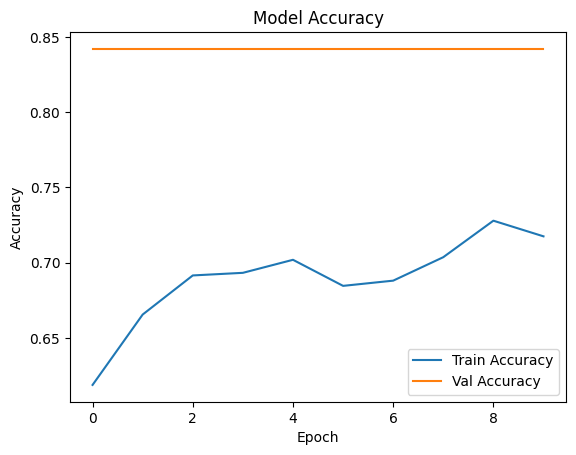

In [12]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

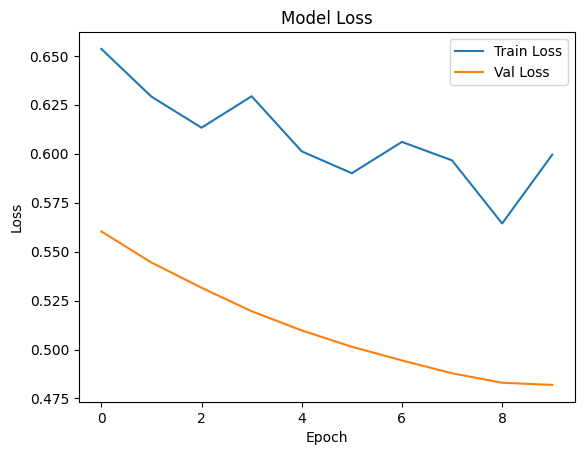

In [13]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [14]:
model.save("skin_cnn.h5")